### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 




<a id="0"></a> <br>
 # Table of Contents 
1. [Data Understanding and Data Preparation](#1)
    - [1.1. Data Description](#2)
    - [1.2. Problems](#3) 
    - [1.3. Data Preparation](#20) 
1. [Coupon Investigation](#4)
1. [Bar Coupon Investigation](#5) 
1. [Independent Investigation](#7) 
    - [4.1. Deciding which coupon type to investigate](#8)
        - [4.1.1. Heatmap](#9)
        - [4.1.2. Coupon Type Comparison](#10) 
    - [4.2. Investigate Coffee House Coupons and compare them to Bar Coupons](#11)
        - [4.2.1. Bar/CoffeeHouse Coupons - Female v Male by Occupation](#12)
        - [4.2.2. Not Accepted (Y==0) Bar/CoffeeHouse Coupons - by age and gender, and with / without children](#13)
        - [4.2.3. Accepted (Y==1) Bar/CoffeeHouse Coupons - by age and gender, and with / without children](#14)
        - [4.2.4. Acceptance Rate for CoffeeHouse Coupons](#15) 
1. [Findings](#16) 
    - [5.1. Bar Coupons](#17) 
    - [5.2. CoffeeHouse Coupons](#18) 
 

<a id="1"></a>
# 1. Data Understanding and Data Preparation

<a id="2"></a>
### 1.1. Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:

1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline


In [2]:
#due to library giving userwarning (even after updating versions) UserWarning: The figure layout has changed to tight
#  self._figure.tight_layout(*args, **kwargs)
import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>
### 1.2. Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [6]:
# how many columns have empty entries
total_cols = np.count_nonzero(data.isnull().sum())

print('\033[1m'+"\nANSWER to #2:"+'\033[0m')
print('\033[1m'+"The total number of columns that have empty entries is "+'\033[0m', total_cols,"\n")


ANSWER to #2:
The total number of columns that have empty entries is  6 



In [7]:
 data.describe(include='object')

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


In [8]:
# missing value count per column
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<a id="20"></a>
### 1.3. Data Preparation

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#don't want to drop columns becasue those columns are probably important later on, replace with unknown
modified_df = data.replace(np.nan, 'unknown')
modified_df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [10]:
# columns of type object
obj_cols = modified_df.select_dtypes(include = ['object'])

# check what unique non-numeric data we are working with 
for col in data:
  print(col, " = ", str(modified_df[col].unique()).replace("]", "]\n"))

destination  =  ['No Urgent Place' 'Home' 'Work']

passanger  =  ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather  =  ['Sunny' 'Rainy' 'Snowy']

temperature  =  [55 80 30]

time  =  ['2PM' '10AM' '6PM' '7AM' '10PM']

coupon  =  ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

expiration  =  ['1d' '2h']

gender  =  ['Female' 'Male']

age  =  ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus  =  ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

has_children  =  [1 0]

education  =  ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation  =  ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Sc

In [11]:
# create a datadictionary for those unique values. Mainly because I am familiar with datadictionaries. There is no list of unique values in the 100s
# there may be a better way of doing this, enums or categories or a nifty library but at this time I'll use a dictionary. 
col_datadictionary  = dict()
for col_i in obj_cols.columns:
    col_datadictionary[col_i] = {idx:value for idx , value in enumerate(modified_df[col_i].unique())}
    
print("--- Datadictionary -- \n", str(col_datadictionary).replace("},", "},\n\n"))

--- Datadictionary -- 
 {'destination': {0: 'No Urgent Place', 1: 'Home', 2: 'Work'},

 'passanger': {0: 'Alone', 1: 'Friend(s)', 2: 'Kid(s)', 3: 'Partner'},

 'weather': {0: 'Sunny', 1: 'Rainy', 2: 'Snowy'},

 'time': {0: '2PM', 1: '10AM', 2: '6PM', 3: '7AM', 4: '10PM'},

 'coupon': {0: 'Restaurant(<20)', 1: 'Coffee House', 2: 'Carry out & Take away', 3: 'Bar', 4: 'Restaurant(20-50)'},

 'expiration': {0: '1d', 1: '2h'},

 'gender': {0: 'Female', 1: 'Male'},

 'age': {0: '21', 1: '46', 2: '26', 3: '31', 4: '41', 5: '50plus', 6: '36', 7: 'below21'},

 'maritalStatus': {0: 'Unmarried partner', 1: 'Single', 2: 'Married partner', 3: 'Divorced', 4: 'Widowed'},

 'education': {0: 'Some college - no degree', 1: 'Bachelors degree', 2: 'Associates degree', 3: 'High School Graduate', 4: 'Graduate degree (Masters or Doctorate)', 5: 'Some High School'},

 'occupation': {0: 'Unemployed', 1: 'Architecture & Engineering', 2: 'Student', 3: 'Education&Training&Library', 4: 'Healthcare Support', 5: 'He

In [12]:
#method to extract the dictionary key based on a value
def get_key (dict_,value_):
     for key, value in dict_.items():
        if value_ == value:
            return key
     return "key not found"

In [13]:
#next create new columns using the datadictionary key to map the column entries so that they can be used as numerical entries
for col in obj_cols.columns:
    new_col_name = "dkey_"+col
    modified_df[new_col_name]=modified_df[col].apply(lambda x : get_key(col_datadictionary[col],x))

In [14]:
#numerical age is easier to manipulate so convert age column
modified_df['age'] = modified_df['age'].replace(np.nan, '0')
modified_df['age'] = modified_df['age'].replace("below21", '20')
modified_df['age'] = modified_df['age'].replace("50plus", '51')
modified_df['age'] = modified_df['age'].astype('int64')

In [15]:
#clean up income column
#... first make sure there are upper and lower values for all the income ranges
modified_df["income"] = modified_df["income"].replace('Less than $12500', '$0 - $12500')
modified_df["income"] = modified_df["income"].replace('$100000 or More', '$100000 - $999991')

#... and remove the $ char
modified_df['income'] = modified_df['income'].str.replace('$', '')

In [16]:
#... next split income into 2 columns based on the '-' character of the income range
new = modified_df["income"].str.split(" - ", n=1, expand=True)
# making separate columns from new data frame
modified_df["income_lowerbound"] = new[0]
modified_df["income_upperbound"] = new[1]

#... and take a look
modified_df[["income","income_lowerbound","income_upperbound"]]

,income,income_lowerbound,income_upperbound
0,37500 - 49999,37500,49999
1,37500 - 49999,37500,49999
2,37500 - 49999,37500,49999
3,37500 - 49999,37500,49999
4,37500 - 49999,37500,49999
...,...,...,...
12679,75000 - 87499,75000,87499
12680,75000 - 87499,75000,87499
12681,75000 - 87499,75000,87499
12682,75000 - 87499,75000,87499


In [17]:
#... then change the column type to int64
modified_df["income_lowerbound"] = modified_df["income_lowerbound"].astype('int64')
modified_df["income_upperbound"] = modified_df["income_upperbound"].astype('int64')
# finally drop the old income column
modified_df.drop(columns=["income"], inplace=True)

In [18]:
#time to check what the modified dataframe looks like
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   destination                12684 non-null  object
 1   passanger                  12684 non-null  object
 2   weather                    12684 non-null  object
 3   temperature                12684 non-null  int64 
 4   time                       12684 non-null  object
 5   coupon                     12684 non-null  object
 6   expiration                 12684 non-null  object
 7   gender                     12684 non-null  object
 8   age                        12684 non-null  int64 
 9   maritalStatus              12684 non-null  object
 10  has_children               12684 non-null  int64 
 11  education                  12684 non-null  object
 12  occupation                 12684 non-null  object
 13  car                        12684 non-null  object
 14  Bar   

**During data analysis and data Preparation**

1. created a new dataframe: modified_df
2. replaced NaN, null and/or missing entries with 'unknown' 
3. created a datadictionary. I think this will allow us to treat these columns as numerical columns.
    for object columns, created new columns using the datadictionary keys as numerical entries that map to the values 
4. converted age column to a numerical column (below21 is now 20, 50plus is now 51). 
    Note that we can always go back to original values via datadictionary and/or original dataframe 
5. removed the $ and split income column into income_lowerbound and income_upperbound columns  
    also converted the new income columns to numerical columns. Note that we can always go back to original values 
    via datadictionary and/or original dataframe

In [19]:
subset = modified_df.sample(n=5)
subset

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,dkey_occupation,dkey_income,dkey_car,dkey_Bar,dkey_CoffeeHouse,dkey_CarryAway,dkey_RestaurantLessThan20,dkey_Restaurant20To50,income_lowerbound,income_upperbound
11720,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Female,21,Single,...,8,3,0,3,1,3,0,2,75000,87499
2907,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,9,5,0,1,3,2,1,1,25000,37499
745,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,51,Married partner,...,4,5,0,2,3,1,0,0,25000,37499
9654,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Male,21,Single,...,2,5,0,2,2,1,1,5,25000,37499
1311,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,2,0,0,0,3,2,0,2,37500,49999


<a id="4"></a> 
# 2. Coupon Investigation

4. What proportion of the total observations chose to accept the coupon? 

In [20]:
#calculate total observations that accepted (Y==1)
accepted_coupons_df= modified_df.query('Y == 1')['coupon'].value_counts()
print('\033[1m'+"\nANSWER to #4:"+'\033[0m')
print('\033[1m'+"The proportion of the total observations that chose to accept the coupon is "+'\033[0m', accepted_coupons_df.sum()/len(modified_df),"\n")


ANSWER to #4:
The proportion of the total observations that chose to accept the coupon is  0.5684326710816777 



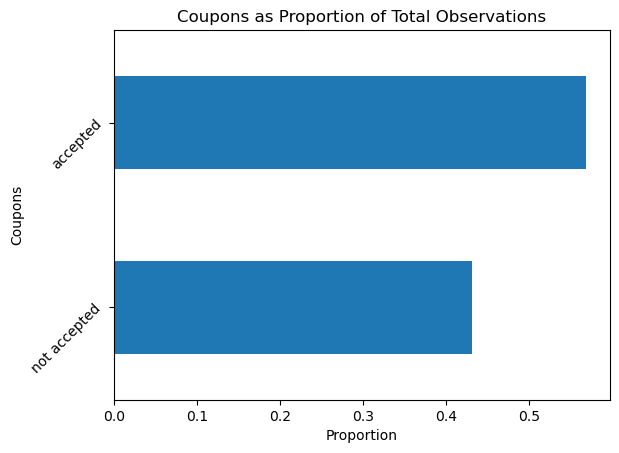

<Figure size 640x480 with 0 Axes>

In [21]:
# let's plot it
grpd_cpn_4df=modified_df.groupby(['Y'], as_index=False).count()
grpd_cpn_4df['coupon_p'] = (grpd_cpn_4df['coupon'] / grpd_cpn_4df['coupon'].sum())
fig4dfax=grpd_cpn_4df['coupon_p'].plot(x = 'Y', kind = 'barh', stacked = True, ylabel="Coupons",xlabel="Proportion",title = 'Coupons as Proportion of Total Observations', mark_right = True)
fig4dfax.set_yticks([0,1])
fig4dfax.set_yticklabels(["not accepted","accepted"], minor=False, rotation=45)

savefig1 = plt.gcf()
plt.show()
plt.draw()
savefig1.savefig('images/coupons_as_proportion_of_total_Observations.png')

5. Use a bar plot to visualize the `coupon` column.

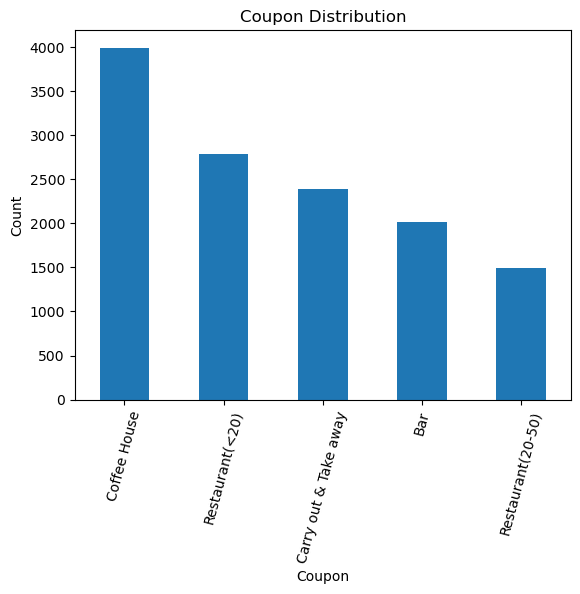

<Figure size 640x480 with 0 Axes>

In [22]:
modified_df['coupon'].value_counts().plot(kind="bar")
plt.title("Coupon Distribution")
plt.xlabel("Coupon")
plt.ylabel('Count')
plt.xticks(rotation=75)

savefig2 = plt.gcf()
plt.show()
plt.draw()
savefig2.savefig('images/coupon_distribution.png')

6. Use a histogram to visualize the temperature column.

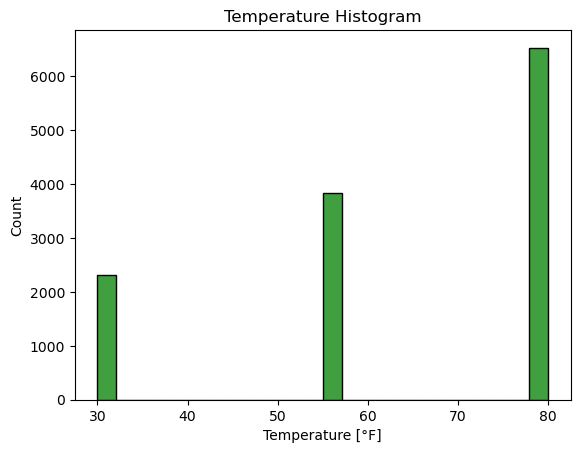

<Figure size 640x480 with 0 Axes>

In [23]:
#let's use a seaborn histogram
sns.histplot(data=modified_df, x="temperature", color = 'green') 
plt.xlabel("Temperature [°F]")
plt.title("Temperature Histogram")

savefig3 = plt.gcf()
plt.show()
plt.draw()
savefig3.savefig('images/temperature_histogram.png')

<a id="5"></a> 
# 3. Bar Coupon Investigation

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
#we want select * from coupon where coupon = 'Bar'
bar_coupon_df = modified_df.query("coupon == 'Bar'")
bar_coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,dkey_occupation,dkey_income,dkey_car,dkey_Bar,dkey_CoffeeHouse,dkey_CarryAway,dkey_RestaurantLessThan20,dkey_Restaurant20To50,income_lowerbound,income_upperbound
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,1,0,0,1,1,0,1,62500,74999
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,1,0,0,1,1,0,1,62500,74999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,6,3,0,0,0,2,0,0,75000,87499
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,6,3,0,0,0,2,0,0,75000,87499
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,6,3,0,0,0,2,0,0,75000,87499
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,6,3,0,0,0,2,0,0,75000,87499


2. What proportion of bar coupons were accepted?


In [25]:
#total population of coupons
total_coupons = modified_df['coupon'].count()

#count of coupons = 'Bar'
ctype_bar_total = len(bar_coupon_df)

#count of accepted coupons = 'Bar'
ctype_bar_accepted = bar_coupon_df.query("Y == 1")["Y"].count()

In [26]:
print('\033[1m'+"\nANSWER #2:"+'\033[0m')
print('\033[1m' +"the proportion of (accepted bar coupons)/(bar coupons) is "+'\033[0m', ctype_bar_accepted/ctype_bar_total," \n")
print('\033[1m' +"the proportion of (accepted bar coupons)/(all coupons) is "+'\033[0m', ctype_bar_accepted/total_coupons," \n")


ANSWER #2:
the proportion of (accepted bar coupons)/(bar coupons) is  0.41001487357461575  

the proportion of (accepted bar coupons)/(all coupons) is  0.065200252286345  



In [27]:
answ2_df=bar_coupon_df.groupby(['Y'], as_index=False).count()
answ2_df['ctype_bar_p'] = (answ2_df['coupon'] / answ2_df['coupon'].sum())
answ2_df['ctype_all_p'] = (answ2_df['coupon'] / modified_df['coupon'].count())

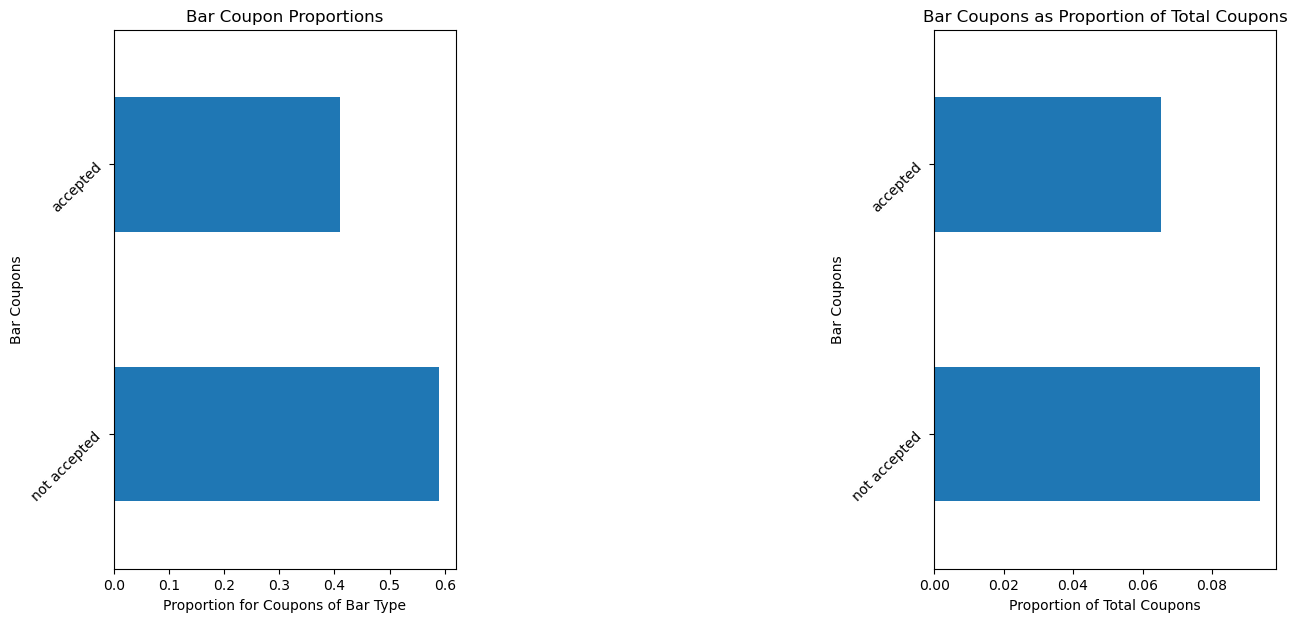

<Figure size 640x480 with 0 Axes>

In [28]:
#let's plot it
coupon_fig2=plt.figure(figsize=(15,7))
fig2ax1=coupon_fig2.add_subplot(1,3,1)
fig2ax1=answ2_df['ctype_bar_p'].plot(x = 'Y', kind = 'barh', stacked = True, ylabel="Bar Coupons",xlabel="Proportion for Coupons of Bar Type",title = 'Bar Coupon Proportions', mark_right = True)
fig2ax1.set_yticks([0,1])
fig2ax1.set_yticklabels(["not accepted","accepted"], minor=False, rotation=45)

fig2ax1=coupon_fig2.add_subplot(1,3,3)
fig2ax2=answ2_df['ctype_all_p'].plot(x = 'Y', kind = 'barh', stacked = True, ylabel="Bar Coupons",xlabel="Proportion of Total Coupons",title = 'Bar Coupons as Proportion of Total Coupons', mark_right = True)
fig2ax2.set_yticks([0,1])
fig2ax2.set_yticklabels(["not accepted","accepted"], minor=False, rotation=45)

savefig4 = plt.gcf()
plt.show()
plt.draw()
savefig4.savefig('images/coupon_proportions.png')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

since datadictionary'Bar': {0: 'never', 1: 'less1', 2: '1 ~ 3', 3: 'gt8', 4: 'unknown', 5: '4~8'}

In [29]:
#let's look at the Bar column
#ignore unknown
bar_entries = modified_df.query('dkey_Bar!=4')['Bar'].count() 

#... calculate the acceptance rate of those who went to a bar 3 or fewer times a month 
ar_bar_3orless = (modified_df.query('dkey_Bar < 3 and Y==1')['Bar'].count() / bar_entries) * 100

print("\nthe acceptance rate of those who went to a bar 3 or fewer times a month is ",ar_bar_3orless," \n")


the acceptance rate of those who went to a bar 3 or fewer times a month is  49.83700405502107  



In [30]:
#still looking at the Bar column
#... and compare it to acceptance rate of dkey_Bar in (3,5) for those who went more than 3 times a month
ar_bar_more_3 = (modified_df.query('(dkey_Bar ==3 or dkey_Bar == 5) and Y==1')['Bar'].count() / bar_entries) * 100

print("the acceptance rate of those who went to a bar more than 3 times a month is ", ar_bar_more_3,"\n")

the acceptance rate of those who went to a bar more than 3 times a month is  7.0525562534785715 



In [31]:
print('\033[1m'+"\nANSWER #3:"+'\033[0m')
print('\033[1m',"The acceptance rate is ", ar_bar_3orless/ar_bar_more_3, 
      " times higher for those who went to a bar 3 or fewer times a month than those who went to a bar more than 3 times a month.",
      '\033[0m',"\n")


ANSWER #3:
 The acceptance rate is  7.066516347237881  times higher for those who went to a bar 3 or fewer times a month than those who went to a bar more than 3 times a month.  



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


since datadictionary'Bar': {0: 'never', 1: 'less1', 2: '1 ~ 3', 3: 'gt8', 4: 'unknown', 5: '4~8'}

In [32]:
#.... calculate accepteance rate for Bar column values(2, 3, 5) & age > 25 & accepted status
ar_drvs_over25 =(modified_df.query('dkey_Bar in [2 ,3,5] and age > 25 and Y == 1')['Bar'].count()/len(modified_df['Bar']))*100

print("\nthe acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is ",ar_drvs_over25,"\n")


the acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is  13.60769473352255 



In [33]:
#... and compare it to acceptance rate of all other drivers = all drivers - above result
other_drvs = modified_df.query('Y == 1')['Bar'].count() - modified_df.query('dkey_Bar in [2,3,5] and age > 25 and Y == 1')['Bar'].count()
ar_other_drvs = (other_drvs/len(modified_df['Bar']))*100

print("\nthe acceptance rate of all other drivers: ",ar_other_drvs,"\n")


the acceptance rate of all other drivers:  43.23557237464522 



In [34]:
print('\033[1m'+"\nANSWER #4:"+'\033[0m')
print('\033[1m',"The acceptance rate of all other drivers is ", ar_other_drvs/ar_drvs_over25, 
      " times higher than those drivers who go to a bar more than once a month and are over the age of 25.",
      '\033[0m',"\n")


ANSWER #4:
 The acceptance rate of all other drivers is  3.1772885283893393  times higher than those drivers who go to a bar more than once a month and are over the age of 25.  



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


**Assumption** 

the questions is to compare the acceptance rate between:

5.a. drivers who go to bars more than once a month and had passengers that were not a kid 



5.b. drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry. 

and since 

1- datadictionary 'Bar': {0: 'never', 1: 'less1', 2: '1 ~ 3', 3: 'gt8', 4: 'unknown', 5: '4~8'}

2- and datadictionary 'passanger': {0: 'Alone', 1: 'Friend(s)', 2: 'Kid(s)', 3: 'Partner'}

3- and datadictionary 'occupation': {... 24: 'Farming Fishing & Forestry'}

In [35]:
#... the acceptance rate for 5a. Bar values in (2,3,5) & no kid passangers & accepted
ar_answ5a =(modified_df.query('dkey_Bar in [2,3,5] and dkey_passanger != 2 and Y == 1')['Bar'].count()/len(modified_df['Bar']))*100

print("\nacceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid is ",ar_answ5a,"\n")


acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid is  18.15673289183223 



In [36]:
#... and the acceptance rate for 5b. Bar values in (2,3,5) & occupation other than farming/fishing/forestry & accepted
ar_answ5b =(modified_df.query('dkey_Bar in [2,3,5] and dkey_occupation !=24 and Y == 1')['Bar'].count()/len(modified_df['Bar']))*100

print("\nacceptance rate of drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry is ",ar_answ5b,"\n")


acceptance rate of drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry is  19.118574582150742 



In [37]:
print('\033[1m'+"\nANSWER #5:"+'\033[0m')
print('\033[1m',"the acceptance rate of drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry  is ", ar_answ5b/ar_answ5a, 
      " times higher than those drivers who go to bars more than once a month and had passengers that were not a kid. Therefore, both of these groups have a similar acceptance rate.",
      '\033[0m',"\n")


ANSWER #5:
 the acceptance rate of drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry  is  1.0529743812418584  times higher than those drivers who go to bars more than once a month and had passengers that were not a kid. Therefore, both of these groups have a similar acceptance rate.  



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



6.a. acceptance rate of those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [38]:
#... the acceptance rate for 6a. Bar values in (2,3,5) & no kid passanger &not widowed & accepted
ar_answ6a = (modified_df.query('dkey_Bar in [2,3,5] and dkey_passanger != 2 and maritalStatus !=4 and Y == 1')['Bar'].count()/len(modified_df['Bar']))*100

print("\nacceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is ",ar_answ6a,"\n")


acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is  18.15673289183223 



6.b. acceptance rate of those drivers who go to bars more than once a month and are under the age of 30 

In [39]:
#... the acceptance rate for 6b.Bar values in (2,3,5) & age < 30 & accepted
ar_answ6b = (modified_df.query('dkey_Bar in [2,3,5] and age < 30 and Y == 1')['Bar'].count()/len(modified_df['Bar']))*100

print("\nacceptance rate of drivers who go to bars more than once a month and are under the age of 30 is ",ar_answ6b,"\n")


acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is  11.250394197414066 



6.c. acceptance rate of those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

In [40]:
#... the acceptance rate for 6c.cheap restaurants & income<50k & accepted
ar_answ6c = (modified_df.query('dkey_RestaurantLessThan20 in [0,3] and income_upperbound < 50000 and Y == 1')['income_upperbound'].count()/len(modified_df['income_upperbound']))*100

print("\nacceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is ",ar_answ6c,"\n")


acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is  10.793125197098707 



In [41]:
print('\033[1m'+"\nANSWER #6:"+'\033[0m')
print('\033[1m',"the highest acceptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed ",'\033[0m')
print('\033[1m',"the lowest acceptance rate go to cheap restaurants more than 4 times a month and income is less than 50K ",'\033[0m')
print("because the acceptance rate of those drivers who ",
      "\ngo to bars more than once a month, had passengers that were not a kid, and were not widowed = ",ar_answ6a,
      "\ngo to bars more than once a month and are under the age of 30 = ",ar_answ6b,
      "\ngo to cheap restaurants more than 4 times a month and income is less than 50K = ",ar_answ6c,"\n\n")


ANSWER #6:
 the highest acceptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed  
 the lowest acceptance rate go to cheap restaurants more than 4 times a month and income is less than 50K  
because the acceptance rate of those drivers who  
go to bars more than once a month, had passengers that were not a kid, and were not widowed =  18.15673289183223 
go to bars more than once a month and are under the age of 30 =  11.250394197414066 
go to cheap restaurants more than 4 times a month and income is less than 50K =  10.793125197098707 




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**My hypothesis is that gender, occupation and if children are present influence the choice of accepting a coupon or not**

<a id="7"></a>
# 4. Independent Investigation

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  



<a id="8"></a>
## 4.1. Deciding which coupon type to investigate

<a id="9"></a>
### 4.1.1. Heatmap

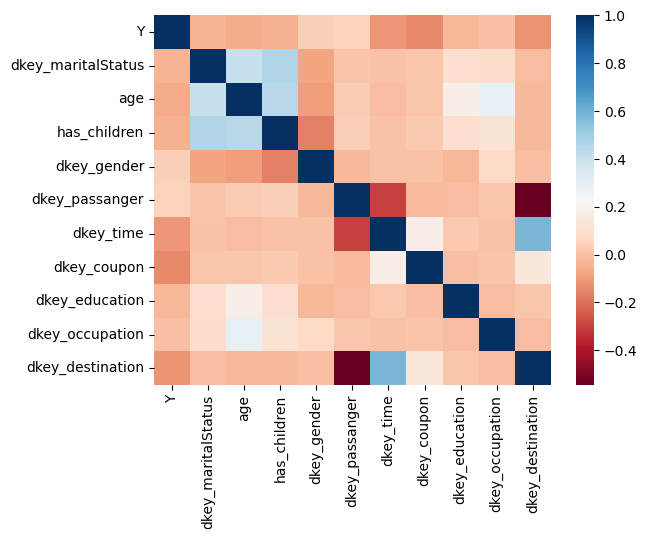

<Figure size 640x480 with 0 Axes>

In [42]:
#start with a look at possible characteristics
characteristics_df = modified_df[['Y',
                       'dkey_maritalStatus','age','has_children','dkey_gender',
                       'dkey_passanger','dkey_time','dkey_coupon',
                       'dkey_education','dkey_occupation','dkey_destination']]

sns.heatmap(characteristics_df.corr(),cmap='RdBu')

savefig5 = plt.gcf()
plt.show()
plt.draw()
savefig5.savefig('images/coupon_heatmap.png')

**Observation1: coupon type, time, destination, age, and children have a high impact on coupon acceptance.**

<a id="10"></a>
### 4.1.2. Coupon Type Comparison

In [43]:
coupon_percent_df = modified_df.groupby('Y')['coupon'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
coupon_count_df = modified_df.groupby('Y')['coupon'].value_counts().rename('Count').reset_index()
coupon_df =pd.merge(left=coupon_percent_df, right=coupon_count_df, left_on=['coupon','Y'],right_on=['coupon','Y'])
coupon_df

,Y,coupon,Percent,Count
0,0,Coffee House,36.554622,2001
1,0,Bar,21.739130,1190
2,0,Restaurant(20-50),15.235659,834
3,0,Restaurant(<20),14.906832,816
4,0,Carry out & Take away,11.563756,633
5,1,Coffee House,27.669903,1995
6,1,Restaurant(<20),27.323162,1970
7,1,Carry out & Take away,24.410541,1760
8,1,Bar,11.470180,827
9,1,Restaurant(20-50),9.126214,658


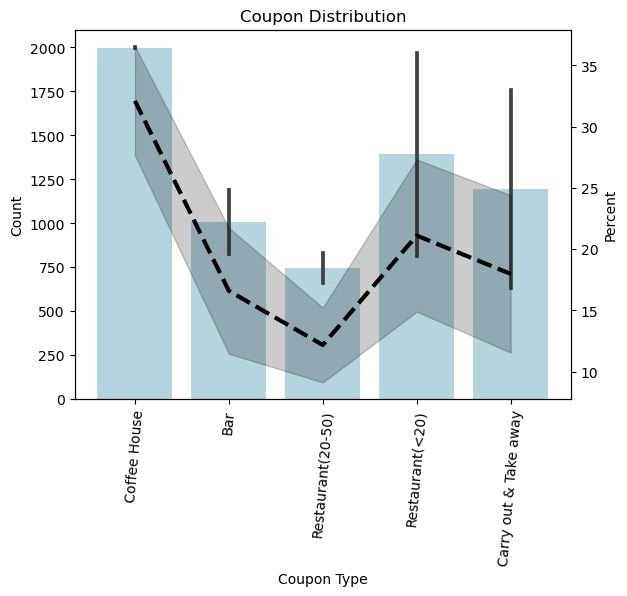

<Figure size 640x480 with 0 Axes>

In [44]:
#plot coupon count and percentange
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(data=coupon_df, x="coupon", y="Count", color="lightblue", ax=ax1)
ax1.set(xlabel ="Coupon Type", ylabel = "Count", title ='Coupon Distribution')
sns.lineplot(data=coupon_df, x="coupon", y= "Percent", color="black", lw=3, ls="--", ax=ax2)
ax1.set_xticklabels(coupon_df['coupon'].unique(), rotation=85)

savefig6 = plt.gcf()
plt.show()
plt.draw()
savefig6.savefig('images/coupon_count_percent_distribution.png')

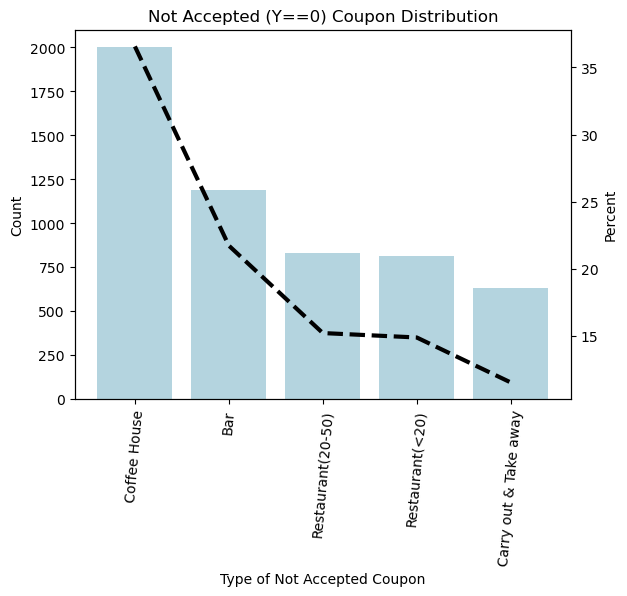

<Figure size 640x480 with 0 Axes>

In [45]:
#plot NOT accepted coffee house coupons, Y==0
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(data=coupon_df.loc[coupon_df.Y==0], x="coupon", y="Count", color="lightblue", ax=ax1)
ax1.set(xlabel ="Type of Not Accepted Coupon", ylabel = "Count", title ='Not Accepted (Y==0) Coupon Distribution')
sns.lineplot(data=coupon_df.loc[coupon_df.Y==0], x="coupon", y= "Percent", color="black", lw=3, ls="--", ax=ax2)
ax1.set_xticklabels(coupon_df['coupon'].unique(), rotation=85)

savefig6 = plt.gcf()
plt.show()
plt.draw()
savefig6.savefig('images/coupon_y_0_distribution.png')

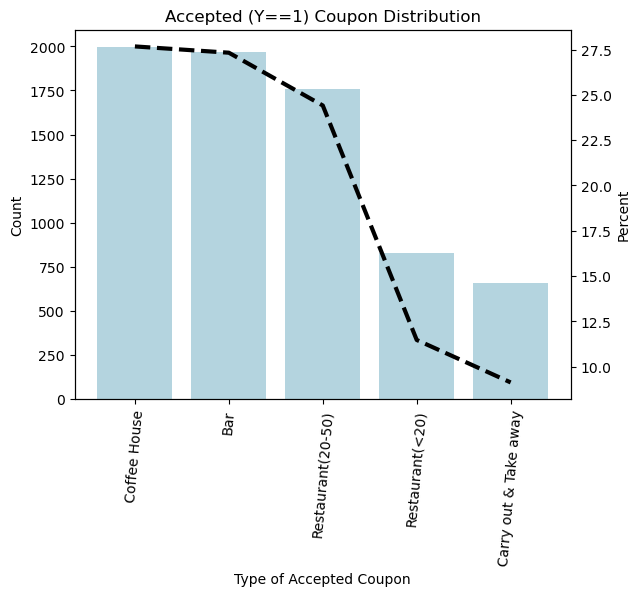

<Figure size 640x480 with 0 Axes>

In [46]:
#plot accepted coffee house coupon, Y ==1
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.xlabel("Accepted Coupon Type")
sns.barplot(data=coupon_df.loc[coupon_df.Y==1], x="coupon", y="Count", color="lightblue", ax=ax1)
ax1.set(xlabel ="Type of Accepted Coupon", ylabel = "Count", title ='Accepted (Y==1) Coupon Distribution')
sns.lineplot(data=coupon_df.loc[coupon_df.Y==1], x="coupon", y= "Percent", color="black", lw=3, ls="--", ax=ax2)
ax1.set_xticklabels(coupon_df['coupon'].unique(), rotation=85)

savefig7 = plt.gcf()
plt.show()
plt.draw()
savefig7.savefig('images/coupon_y_1_distribution.png')

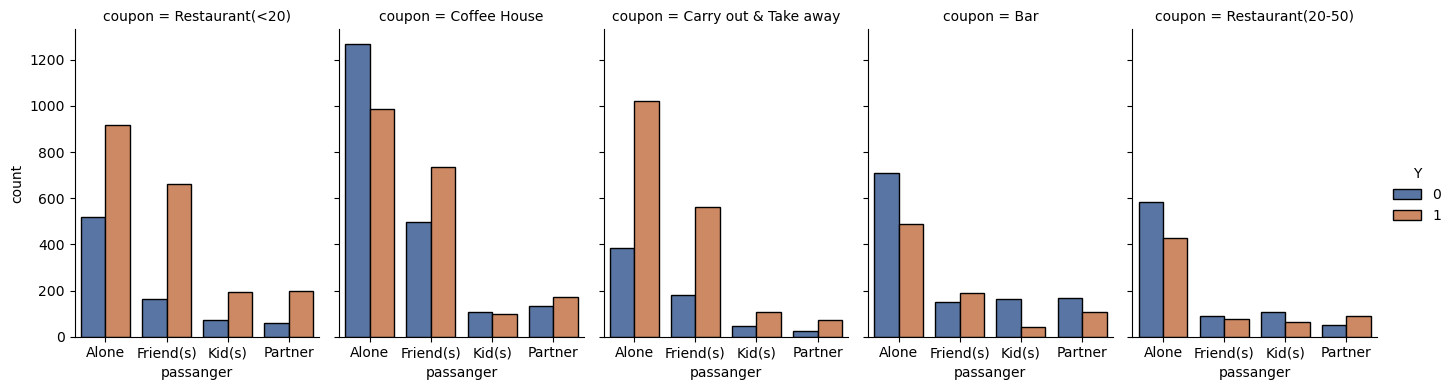

<Figure size 640x480 with 0 Axes>

In [47]:
sns.catplot(x="passanger", data=modified_df,col="coupon",hue="Y",edgecolor="black",kind="count",height=4, aspect=0.7,palette="deep")

savefig8= plt.gcf()
plt.show()
plt.draw()
savefig8.savefig('images/coupon_catplot.png')

**Observation2:**

* the passanger category = Alone is the top category among all the coupon types.

* In general, the barplots above show the Coupons of type Coffee House and of type Bar are the top 2 coupon types accepted.
However, when we breakout by coupon types using the catplot and look at the passangers, the 'Carry out & take away' coupons are prefered by those with Alone passangers; however, they (Alone passangers) tend to no accept the 'Coffee House' coupons.



<a id="11"></a>
## 4.2. Investigate Coffee House Coupons and compare them to Bar Coupons

In [48]:
#so let's create a df for coffee house coupons
coffeeH_coupon_df = modified_df.query("coupon == 'Coffee House'")
coffeeH_coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,dkey_occupation,dkey_income,dkey_car,dkey_Bar,dkey_CoffeeHouse,dkey_CarryAway,dkey_RestaurantLessThan20,dkey_Restaurant20To50,income_lowerbound,income_upperbound
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,0,0,0,0,0,0,37500,49999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,19,6,0,1,0,1,3,1,100000,999991
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,19,6,0,1,0,1,3,1,100000,999991
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,6,3,0,0,0,2,0,0,75000,87499
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,6,3,0,0,0,2,0,0,75000,87499


In [49]:
#for a consistent Female v Male color
hue_order = coffeeH_coupon_df['gender'].unique()


<a id="12"></a>
### 4.2.1. Bar/CoffeeHouse Coupons - Female v Male by Occupation 

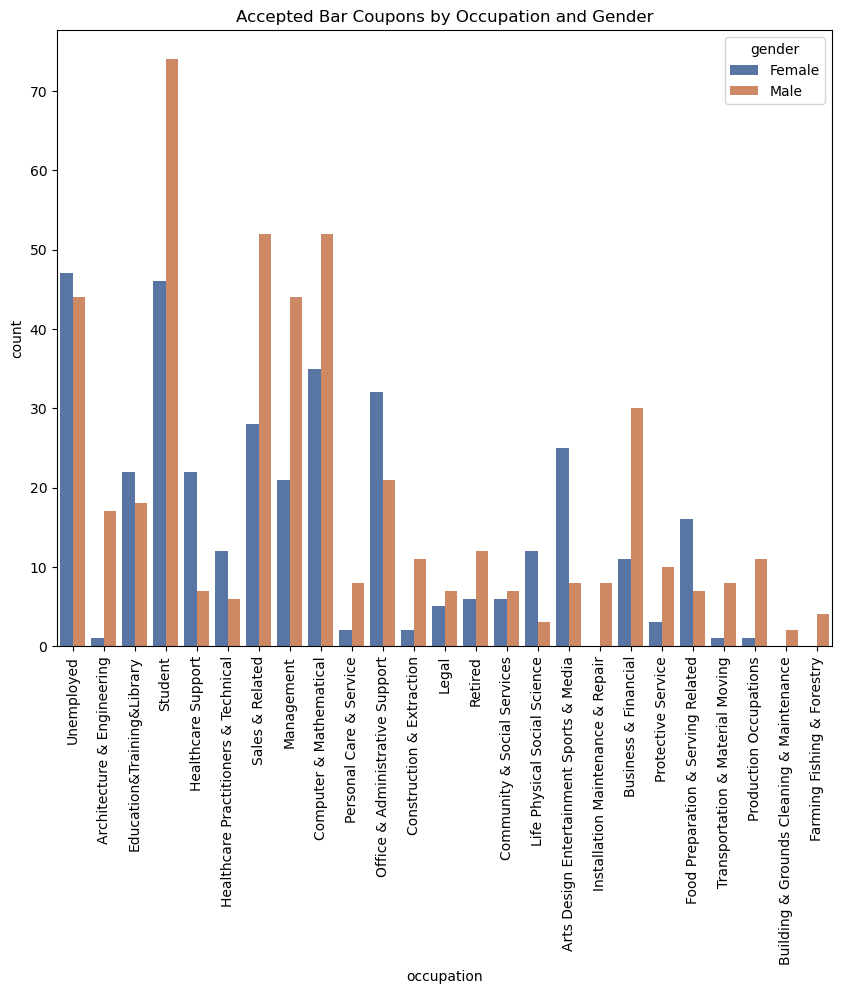

<Figure size 640x480 with 0 Axes>

In [50]:
#let's check female v male by occupation for bar coupons
plt.figure(figsize=(10, 8))
sns.countplot(data=bar_coupon_df.query('Y == 1'), x='occupation', hue='gender',hue_order=hue_order,palette = "deep")
plt.xticks(rotation = 90)
plt.title('Accepted Bar Coupons by Occupation and Gender')

savefig9= plt.gcf()
plt.show()
plt.draw()
savefig9.savefig('images/bar_coupon_y_1_occupation_gender.png')

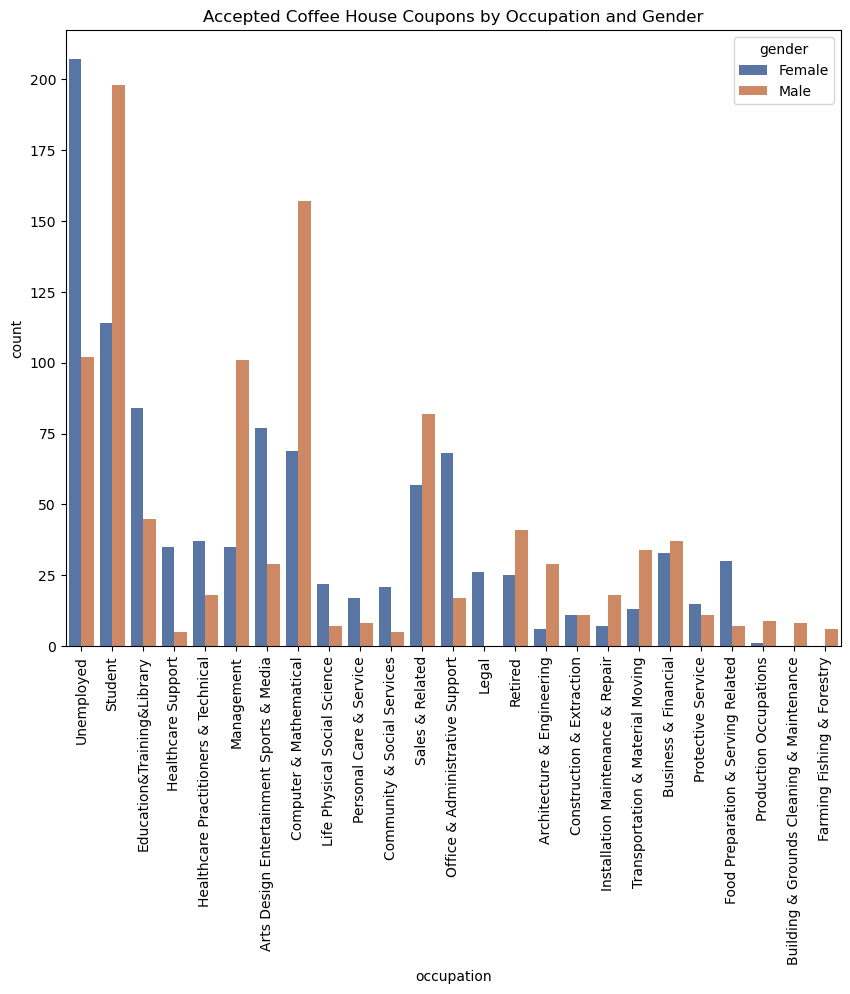

<Figure size 640x480 with 0 Axes>

In [51]:
#let's check female v male by occupation for coffeeHouse coupons
plt.figure(figsize=(10, 8))
sns.countplot(data=coffeeH_coupon_df.query('Y == 1'), x='occupation', hue='gender',hue_order=hue_order,palette = "deep")
plt.xticks(rotation = 90)
plt.title('Accepted Coffee House Coupons by Occupation and Gender')

savefig10= plt.gcf()
plt.show()
plt.draw()
savefig10.savefig('images/coffee_coupon_y_1_occupation_gender.png')

**Observation3:**

**Bar Coupons**
male students accept Bar coupons the most. A distance second are males that work in Sales & Related fields.

**CoffeeHouse Coupons**
unemployed women accept coffeeHouse coupons the most. Closely followed by male students.



#### Create a method to use later on

In [52]:
def create_count_subplots(fig_,supTitle_,ax1_title_,ax1_data_,ax2_title_,ax2_data_,ax3_title_,ax3_data_):
    ax1=fig_.add_subplot(3,3,1)    
    sns.countplot(ax=ax1, data=ax1_data_, x='age', hue='gender',hue_order=hue_order,palette = 'deep')
    plt.xlabel("Age [yrs]")
    ax1.title.set_text(ax1_title_)
    
    ax2=fig_.add_subplot(3,3,3)
    sns.countplot(ax=ax2,data=ax2_data_, x='age', hue='gender',hue_order=hue_order,palette = 'deep')
    plt.xlabel("Age [yrs]")
    ax2.title.set_text(ax2_title_)
    
    ax3=fig_.add_subplot(3,3,5)
    sns.countplot(ax=ax3,data=ax3_data_, x='age', hue='gender',hue_order=hue_order,palette = 'deep')
    plt.xlabel("Age [yrs]")
    ax3.title.set_text(ax3_title_)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.suptitle(supTitle_,y=0.92,weight='bold')
    
    


<a id="13"></a>
### 4.2.2. Not Accepted (Y==0) Bar/CoffeeHouse Coupons - by age and gender, and with / without children

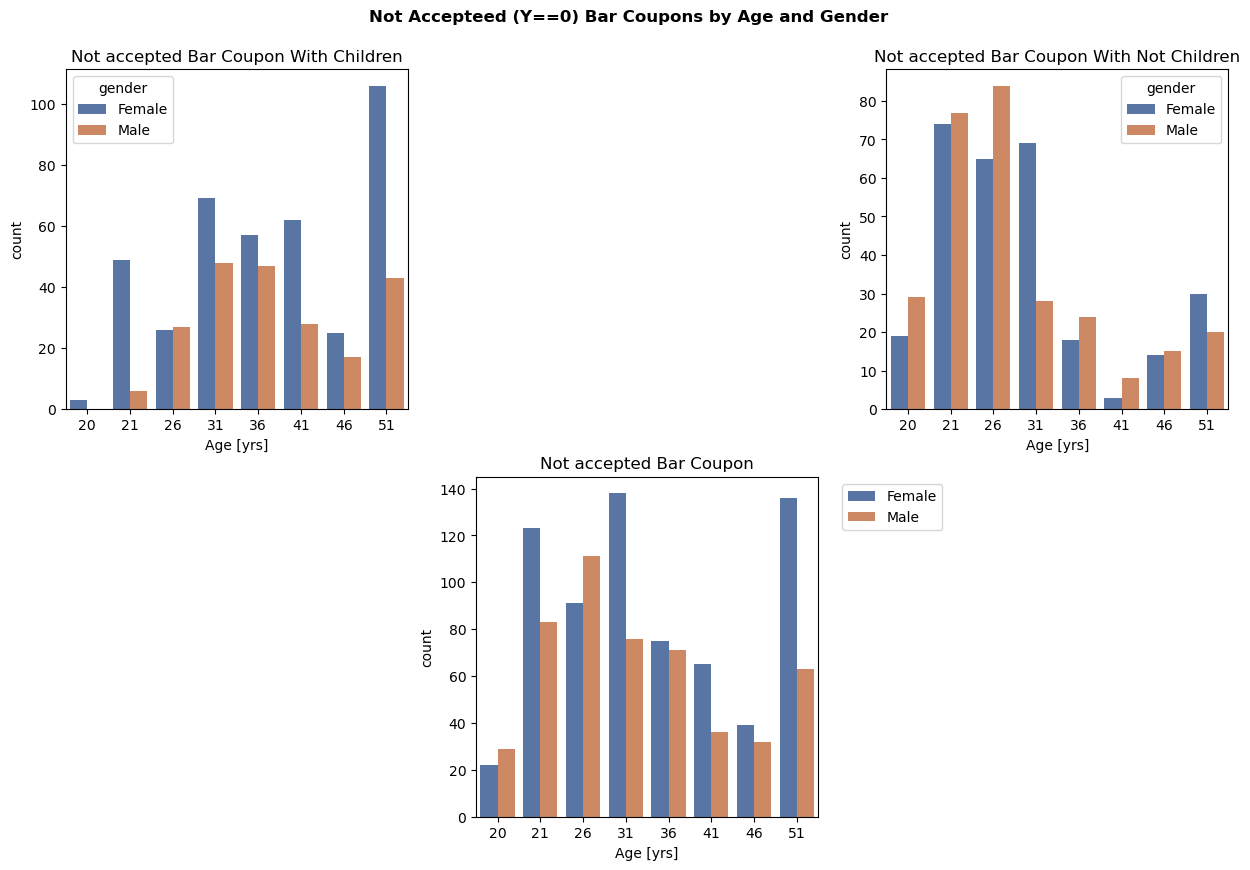

<Figure size 640x480 with 0 Axes>

In [53]:
#let's look at how age and children affect bar coupons not being accepted (Y==0)
fig1=plt.figure(figsize=(15,15))
create_count_subplots(fig1,
                       'Not Accepteed (Y==0) Bar Coupons by Age and Gender', #supTitle,
                       'Not accepted Bar Coupon With Children', #ax1_title
                       bar_coupon_df.query('Y ==0 and has_children ==1'), #ax1_data
                       'Not accepted Bar Coupon With Not Children', #ax2_title
                       bar_coupon_df.query('Y ==0 and has_children ==0'), #ax2_data,
                       'Not accepted Bar Coupon', #ax3_title
                       bar_coupon_df.query('Y ==0') #ax3_data
                       )

savefig11= plt.gcf()
plt.show()
plt.draw()
savefig11.savefig('images/bar_coupon_y_0_age_gender.png')

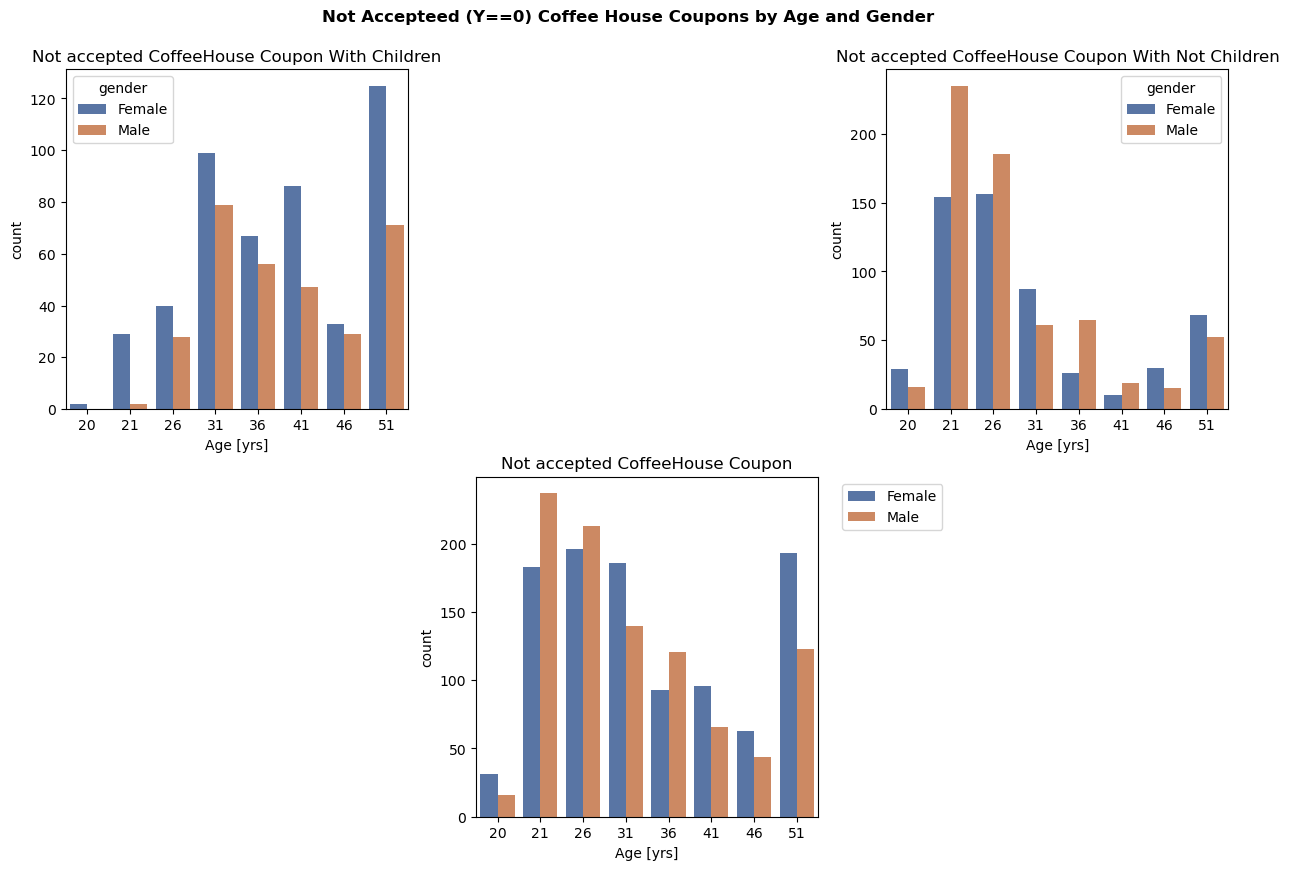

<Figure size 640x480 with 0 Axes>

In [54]:
#and how age and children affect Coffee House coupons not being accepted (Y==0)
fig2=plt.figure(figsize=(15,15))
create_count_subplots(fig2,
                       'Not Accepteed (Y==0) Coffee House Coupons by Age and Gender', #supTitle,
                       'Not accepted CoffeeHouse Coupon With Children', #ax1_title
                       coffeeH_coupon_df.query('Y ==0 and has_children ==1'), #ax1_data
                       'Not accepted CoffeeHouse Coupon With Not Children', #ax2_title
                       coffeeH_coupon_df.query('Y ==0 and has_children ==0'), #ax2_data,
                       'Not accepted CoffeeHouse Coupon', #ax3_title
                       coffeeH_coupon_df.query('Y ==0') #ax3_data
                       )

savefig12= plt.gcf()
plt.show()
plt.draw()
savefig12.savefig('images/coffee_coupon_y_0_age_gender.png')

**Observation4:**

**Bar Coupons**
In general females 21, 31 and over 50 year olds are more likely not to accept bar coupons. But when children are factored, females of all age groups are more likely to not accept bar coupons when children are present.

**CoffeeHouse Coupons**
In general males 21, 26 year old are more likely not to accept the coffee house coupon. But when children are factored, females of all age groups are more likely to not accept bar coupons when children are present.


<a id="14"></a>
### 4.2.3.  Accepted (Y==1) Bar/CoffeeHouse Coupons - by age and gender, and with / without children

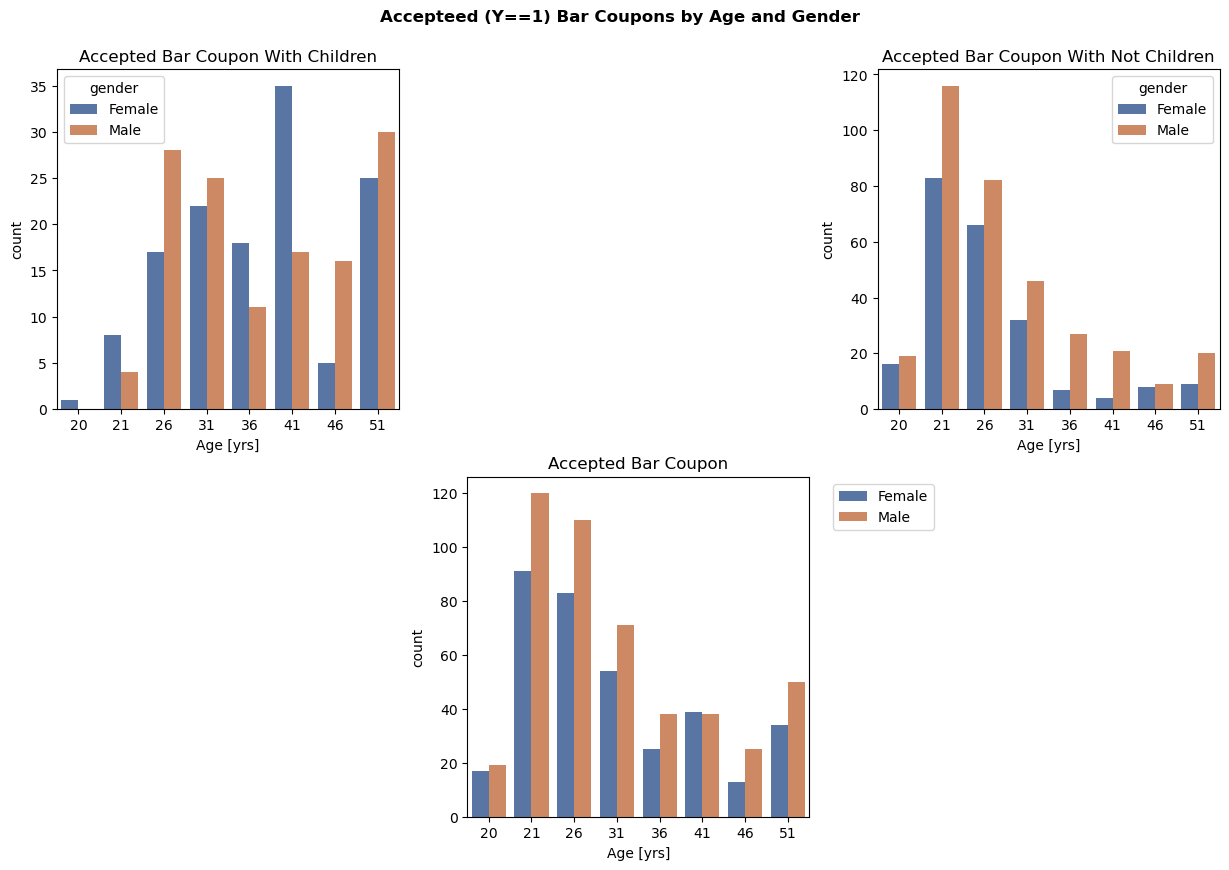

<Figure size 640x480 with 0 Axes>

In [55]:
#now let's look at how age and children affect bar coupon being accepted (Y==1)
fig3=plt.figure(figsize=(15,15))
create_count_subplots(fig3,
                       'Accepteed (Y==1) Bar Coupons by Age and Gender', #supTitle,
                       'Accepted Bar Coupon With Children', #ax1_title
                       bar_coupon_df.query('Y ==1 and has_children ==1'), #ax1_data
                       'Accepted Bar Coupon With Not Children', #ax2_title
                       bar_coupon_df.query('Y ==1 and has_children ==0'), #ax2_data,
                       'Accepted Bar Coupon', #ax3_title
                       bar_coupon_df.query('Y ==1') #ax3_data
                       )

savefig13= plt.gcf()
plt.show()
plt.draw()
savefig13.savefig('images/bar_coupon_y_1_age_gender.png')

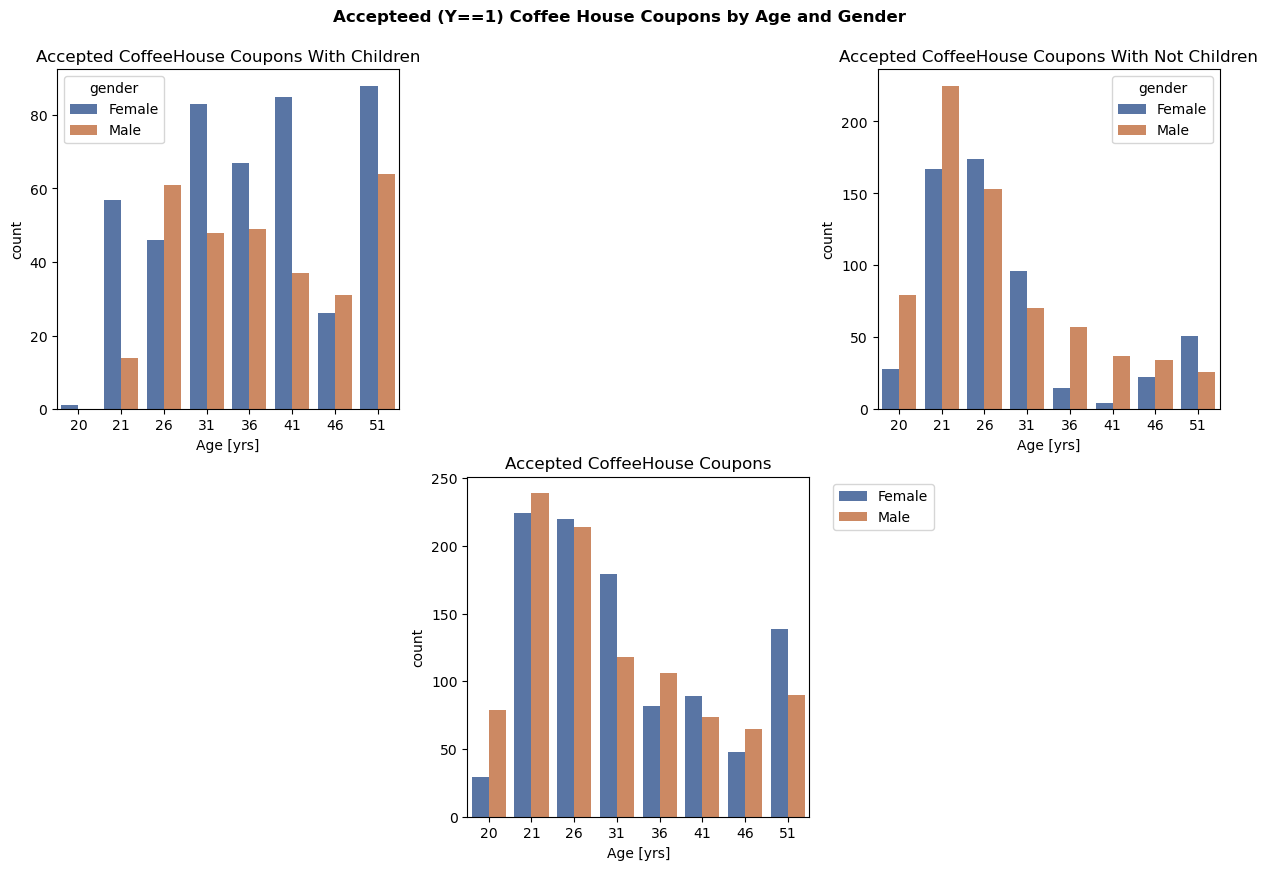

<Figure size 640x480 with 0 Axes>

In [56]:
#and at how age and children affect CoffeHouse coupon being accepted (Y==1)
fig4=plt.figure(figsize=(15,15))
create_count_subplots(fig4,
                       'Accepteed (Y==1) Coffee House Coupons by Age and Gender', #supTitle,
                       'Accepted CoffeeHouse Coupons With Children', #ax1_title
                       coffeeH_coupon_df.query('Y ==1 and has_children ==1'), #ax1_data
                       'Accepted CoffeeHouse Coupons With Not Children', #ax2_title
                       coffeeH_coupon_df.query('Y ==1 and has_children ==0'), #ax2_data,
                       'Accepted CoffeeHouse Coupons', #ax3_title
                       coffeeH_coupon_df.query('Y ==1') #ax3_data
                       )

savefig14= plt.gcf()
plt.show()
plt.draw()
savefig14.savefig('images/coffee_coupon_y_1_age_gender.png')

**Observation5:**

**Bar Coupons**
In general 21, 26, and 31 yr old males accept bar coupons. But when children are factored, 41 yr old females are more likely to  accept Bar coupons when children are present.

**CoffeeHouse Coupons**
In general 21 yr old males are likely to accept a coffee house coupon. But when children are factored, most females (21, 31, 36, 41, over 50 age groups) are more likely to  accept coffeeHouse coupons when children are present.



<a id="15"></a>
## 4.2.4 Acceptance Rate for CoffeeHouse Coupons

In [57]:
#let's look at the CoffeeHouse column
#ignore unknown
ch_entries = modified_df.query('dkey_CoffeeHouse!=4 and dkey_CoffeeHouse!=2')['CoffeeHouse'].count() 

#... calculate the acceptance rate of those who went to a coffeehouse 3 or fewer times a month 
ar_ch_3orless = (modified_df.query('dkey_CoffeeHouse in[0,1,3] and Y==1')['CoffeeHouse'].count() / ch_entries) * 100

print("\nthe acceptance rate of those who went to a CoffeeHouse 3 or fewer times a month is ",ar_ch_3orless," \n")


the acceptance rate of those who went to a CoffeeHouse 3 or fewer times a month is  54.36714679742568  



In [58]:
#... and compare it to acceptance rate of dkey_CoffeeHouse in (2,4) for those who went more than 3 times a month
ar_ch_more_3 = (modified_df.query('(dkey_CoffeeHouse in [2,4]) and Y==1')['CoffeeHouse'].count() / ch_entries) * 100

print("the acceptance rate of those who went to a CoffeeHouse more than 3 times a month is ", ar_ch_more_3,"\n")

the acceptance rate of those who went to a CoffeeHouse more than 3 times a month is  18.163244458065176 



In [59]:

print('\033[1m',"The acceptance rate is ", ar_ch_3orless/ar_ch_more_3, 
      " times higher for those who went to a CoffeeHouse 3 or fewer times a month than those who went to a CoffeeHouse more than 3 times a month.",
      '\033[0m',"\n")


 The acceptance rate is  2.993250843644544  times higher for those who went to a CoffeeHouse 3 or fewer times a month than those who went to a CoffeeHouse more than 3 times a month.  



#### acceptance rate of drivers who go to a CoffeeHouse more than once a month and are over the age of 25 

In [60]:
# datadictionary 'CoffeeHouse': {0: 'never', 1: 'less1', 2: '4~8', 3: '1~3', 4: 'gt8', 5: 'unknown'},
ar_ch_over25 =(modified_df.query('dkey_CoffeeHouse in [2,3,4] and age > 25 and Y == 1')['CoffeeHouse'].count()/len(modified_df['CoffeeHouse']))*100

print("\nthe acceptance rate of drivers who go to a Coffee Houses more than 3 times a month and are over the age of 25 is ",ar_ch_over25,"\n")



the acceptance rate of drivers who go to a Coffee Houses more than 3 times a month and are over the age of 25 is  21.428571428571427 



In [61]:
#compare it to acceptance rate of all other drivers = all drivers - above result
other_ch_drvs = modified_df.query('Y == 1')['CoffeeHouse'].count() - modified_df.query('dkey_CoffeeHouse in [2,3,4] and age > 25 and Y == 1')['CoffeeHouse'].count()
ar_other_ch_drvs = (other_ch_drvs/len(modified_df['CoffeeHouse']))*100

print("\nthe acceptance rate for all other drivers who went to a CoffeeHouse: ",ar_other_ch_drvs,"\n")


the acceptance rate for all other drivers who went to a CoffeeHouse:  35.41469567959634 



In [62]:
print('\033[1m',"The acceptance rate of coupons for all other drivers who go to a CoffeeHouse  more than once a month is ", ar_other_ch_drvs/ar_ch_over25, 
      " times higher than those drivers who go to a CoffeeHouse more than once a month and are over the age of 25.",
      '\033[0m',"\n")

 The acceptance rate of coupons for all other drivers who go to a CoffeeHouse  more than once a month is  1.6526857983811627  times higher than those drivers who go to a CoffeeHouse more than once a month and are over the age of 25.  



In [63]:
#.... calculate accepteance rate for CoffeHouse column values(2, 3, 4) & age > 25 & accepted status
ar_ch_drvs_over25 =(modified_df.query('dkey_CoffeeHouse in [2 ,3,4] and age > 25 and Y == 1')['CoffeeHouse'].count()/len(modified_df['CoffeeHouse']))*100

print("\nthe acceptance rate of drivers who go to a CoffeHouse more than once a month and are over the age of 25 is ",ar_ch_drvs_over25,"\n")


the acceptance rate of drivers who go to a CoffeHouse more than once a month and are over the age of 25 is  21.428571428571427 




<a id="16"></a>
# 5. Findings

In general, the Coupons of type Coffee House and of type Bar are the top 2 coupon types accepted (Y==1).
However, when we breakout by coupon types and look at the passangers, the 'Carry out & take away' coupons are prefered by those with Alone passangers; however, they (Alone passangers) tend to no accept the 'Coffee House' coupons.

<a id="17"></a>
### 5.1. Bar Coupons


the passanger category = Alone is the top category among all the coupon types.



**Employment** 

* male students accept Bar coupons the most. A distance second are males that work in Sales & Related fields


**By Age and Children**
* In general females 21, 31 and over 50 year olds are more likely not to accept bar coupons. But when children are factored, females of all age groups are more likely to not accept bar coupons when children are present.

* In general 21, 26, and 31 yr old males accept bar coupons. But when children are factored, 41 yr old females are more likely to  accept Bar coupons when children are present.


**Acceptance Rate**
* the acceptance rate of those who went to a bar 3 or fewer times a month is  49.83700405502107 

* the acceptance rate of those who went to a bar more than 3 times a month is  7.0525562534785715 

* the acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is  13.60769473352255 

<a id="18"></a>
### 5.2. CoffeeHouse Coupons

**Employment** 

* unemployed women accept cofee house coupons the most. Closely followed by male students.


**By Age and Children**

* In general males 21, 26 year old are more likely not to accept the coffee house coupon. But when children are factored, females of all age groups are more likely to not accept bar coupons when children are present.


* In general 21 yr old males are likely to accept a coffee house coupon. But when children are factored, most females (21, 31, 36, 41, over 50 age groups) are more likely to  accept coffeeHouse coupons when children are present.


**Acceptance Rate**

* the acceptance rate of those who went to a CoffeeHouse 3 or fewer times a month is  54.36714679742568

* the acceptance rate of those who went to a CoffeeHouse more than 3 times a month is  18.163244458065176 

* the acceptance rate of drivers who go to a CoffeHouse more than once a month and are over the age of 25 is  21.428571428571427 
